In [37]:
import numpy as np
import pandas as pd
#Set the seed for reproducibility
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [38]:
train = pd.read_excel("train.xlsx")
train = pd.read_excel("train.xlsx", parse_dates=['PRICES'])
train['month'] = train['PRICES'].dt.month
train['day'] = train['PRICES'].dt.day
train['year'] = train['PRICES'].dt.year

train.isnull().sum().sum() #no null values
train.isna().sum().sum() #no NA values

train['day of week']=train['PRICES'].dt.dayofweek
print(train.head(10))

train.shape

      PRICES  Hour 01  Hour 02  Hour 03  Hour 04  Hour 05  Hour 06  Hour 07  \
0 2007-01-01    24.31    24.31    21.71     8.42     0.01     0.01     0.02   
1 2007-01-02    16.01    11.00     9.01     7.50     9.00     7.45    16.50   
2 2007-01-03    28.00    24.50    24.15    18.99    15.50    23.11    29.01   
3 2007-01-04    31.01    28.69    27.00    24.20    12.02    27.00    28.00   
4 2007-01-05    22.00    19.50    17.55    15.91    11.40    22.65    27.30   
5 2007-01-06    25.00    22.99    20.99    18.00    16.95    20.01    20.00   
6 2007-01-07    22.00    18.29    16.59     9.17     8.00     8.19     9.01   
7 2007-01-08    13.00    13.00    10.00     3.40    10.00    13.00    24.01   
8 2007-01-09    18.51    16.81    13.01    10.01     8.17    16.00    26.00   
9 2007-01-10    12.43    15.09    13.04    12.01    11.26    16.00    21.01   

   Hour 08  Hour 09  ...  Hour 19  Hour 20  Hour 21  Hour 22  Hour 23  \
0     0.01     0.01  ...    37.99    33.11    37.99    33

(1096, 29)

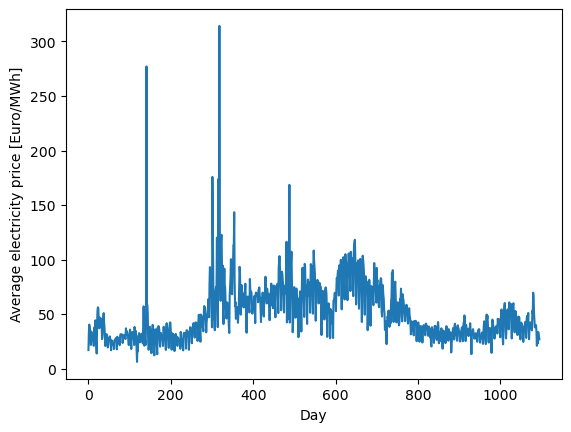

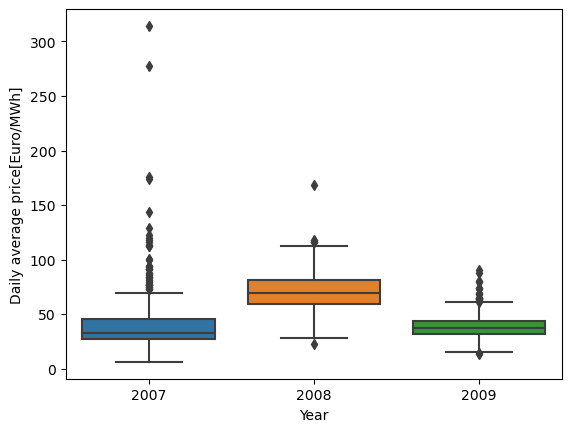

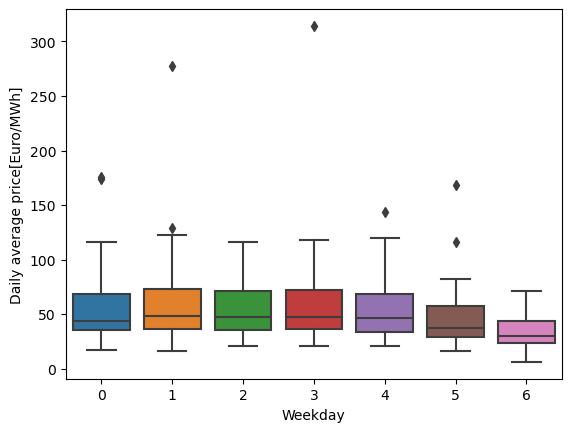

In [142]:
no_days=train.shape[0]
daily_averages=np.zeros(no_days)
for i in range(no_days):
    daily_averages[i]=np.mean(train.iloc[i,1:25])
train['daily average']=daily_averages #these are correct, checked on excel
plt.plot(daily_averages)
plt.xlabel('Day')
plt.ylabel('Average electricity price [Euro/MWh]')
plt.show()


sb.boxplot(x='year', y='daily average' , data=train)
plt.xlabel("Year")
plt.ylabel('Daily average price[Euro/MWh]')
plt.show()

sb.boxplot(x='day of week', y= 'daily average', data=train )
plt.xlabel("Weekday")
plt.ylabel('Daily average price[Euro/MWh]')
plt.show()

In [4]:
train.shape
indices = train[train['daily average']>250].index #maybe remove these
train=train.drop(indices)

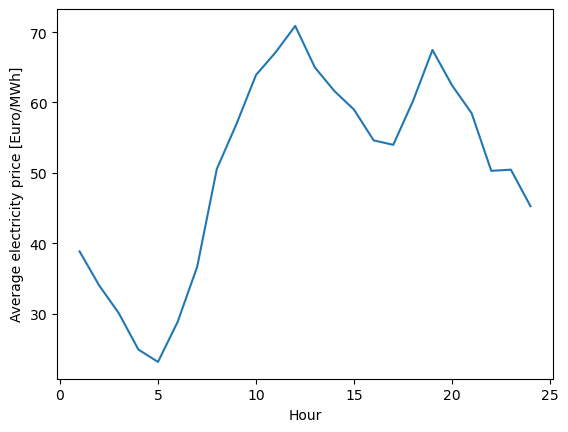

array([38.83812044, 33.99355839, 30.05389599, 24.88116788, 23.12443431,
       28.80376825, 36.65219891, 50.54479015, 56.92439781, 63.9117427 ,
       67.13242701, 70.88373175, 64.99515511, 61.6182573 , 58.98109489,
       54.61488139, 53.98165146, 60.16250912, 67.46607664, 62.43669708,
       58.46425182, 50.28571168, 50.45126825, 45.25933394])

In [34]:
hours = train.select_dtypes(include=["int64", "float64"]).columns

hour_means=np.zeros(24)
for i in range(24):
    hour_means[i]=np.mean(train[hours[i]]) 
plt.plot(np.array(range(1,25)),hour_means)
plt.xlabel('Hour')
plt.ylabel('Average electricity price [Euro/MWh]')
plt.show()

hour_means

In [22]:
months = np.array(range(12))
print(months)

abs((months - 3)// 6)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

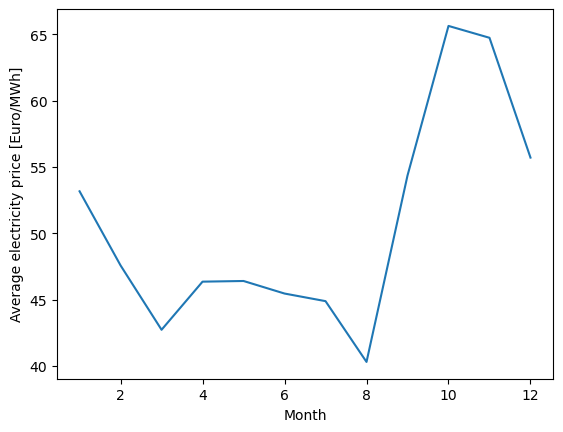

In [35]:
months=train['month'].unique()
monthly_means=np.zeros(12)
for i in range(12):
    monthly_values=train[train['month']==months[i]]['daily average']
    monthly_means[i]=np.mean(monthly_values)
plt.plot(np.array(range(1,13)), monthly_means)
plt.xlabel('Month')
plt.ylabel('Average electricity price [Euro/MWh]')
plt.show()

#correct, checked against excel

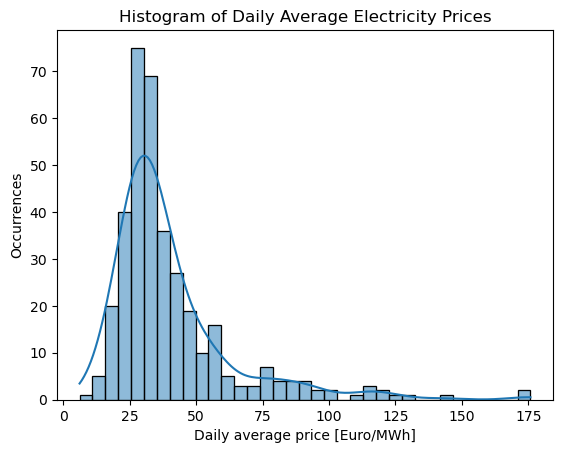

In [26]:
sb.histplot(train[train["year"]==2007]['daily average'], kde=True) 
plt.title('Histogram of Daily Average Electricity Prices')
plt.ylabel('Occurrences')
plt.xlabel('Daily average price [Euro/MWh]')
plt.show()
# do we need to go into possible distributions/time series models? 
# correlations?

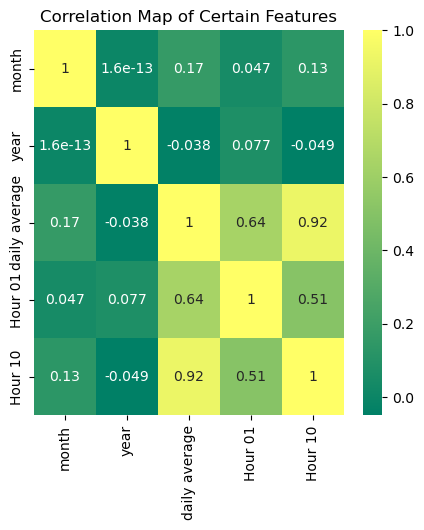

In [8]:
# a correlation heat map
corr = train[['month', 'year', 'daily average','Hour 01', 'Hour 10' ]].corr()
p=2
plt.figure(figsize=(5,5))
sb.heatmap(corr, annot=True, cmap='summer')
plt.title('Correlation Map of Certain Features')
plt.show()

In [ ]:
hour_means=np.zeros([12,24])
max_hour=np.zeros(12)
for i in range(0,12):
    mask=train['month']==i+1
    hours = train[mask].iloc[:,1:25].columns
    for j in range(0,24):    
        hour_means[i,j]=np.mean(train[hours[j]][mask]) 
    max_hour[i]=(np.squeeze(np.array(np.where(hour_means[i,:]==max(hour_means[i,:])))) )

print(max_hour)
hour_means=np.transpose(hour_means)





sb.lineplot(hour_means, palette= ['blue','blue','blue','red','red','red','red','red','red','blue','blue','blue'] )



# Example condition: columns where the mean is greater than 0.5
condition = (max_hour==11)

print(sb.color_palette("rocket"))